In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
#We have min values for Pregnamcies,Glucose, BP,Skin thikness and Insulin as zero which is not possible
## Now lets replce them with mean


In [55]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [56]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


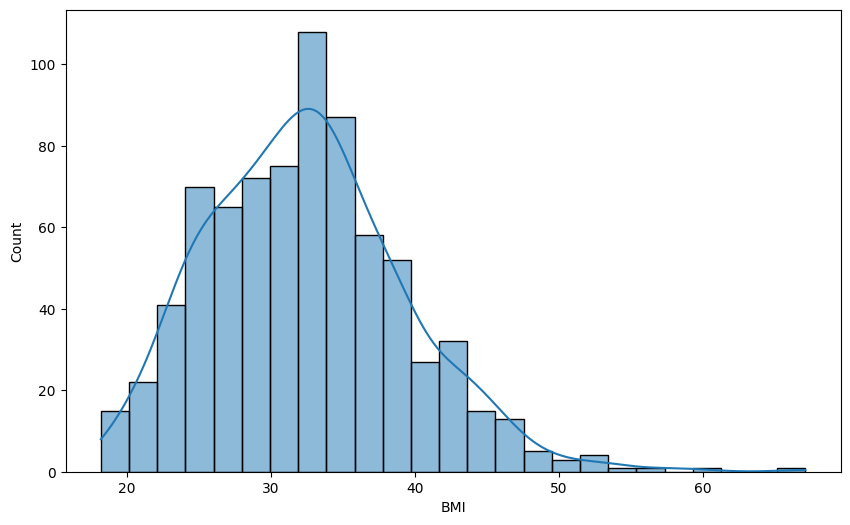

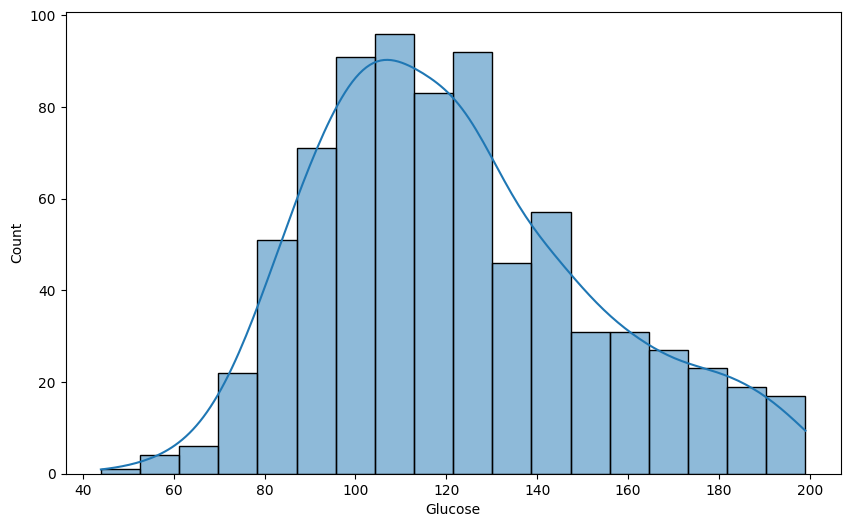

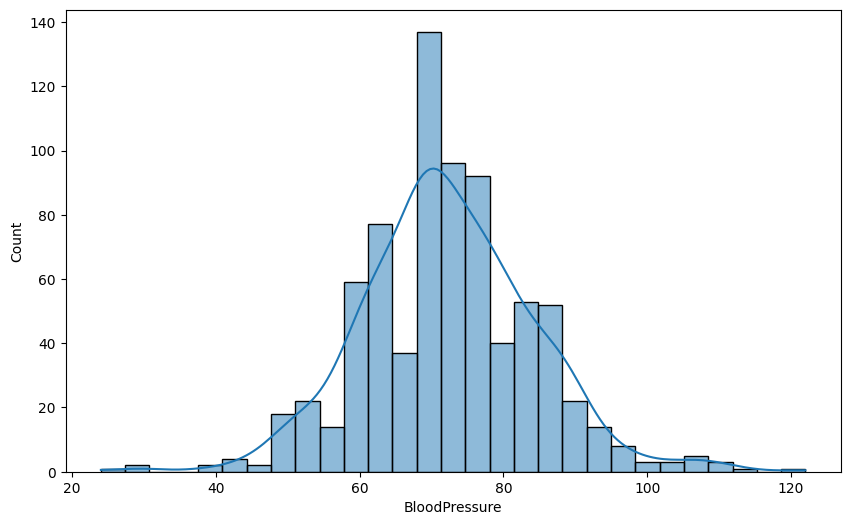

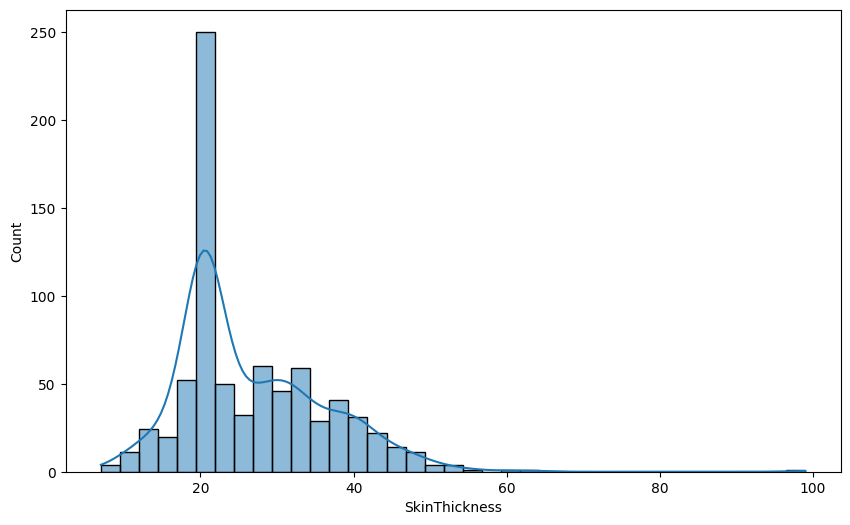

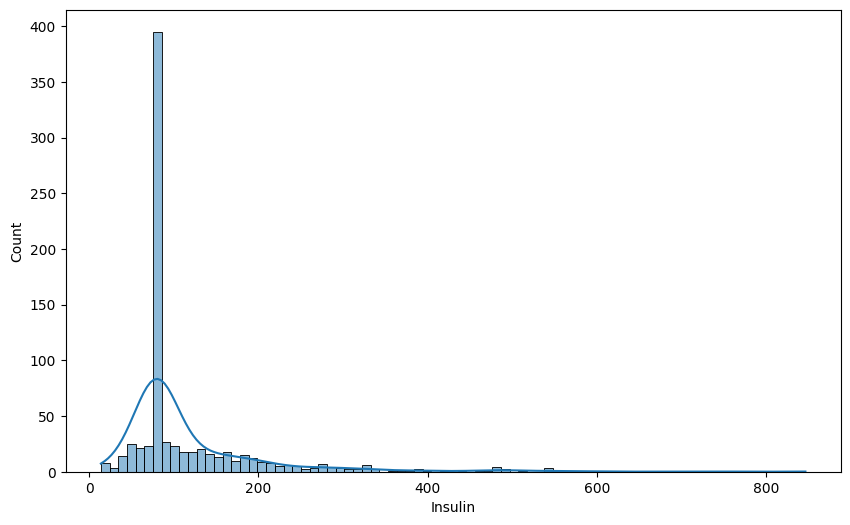

In [87]:
## Now check for outliers

for col in ('BMI','Glucose','BloodPressure','SkinThickness','Insulin'):
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],kde=True)
    plt.plot()



<Axes: >

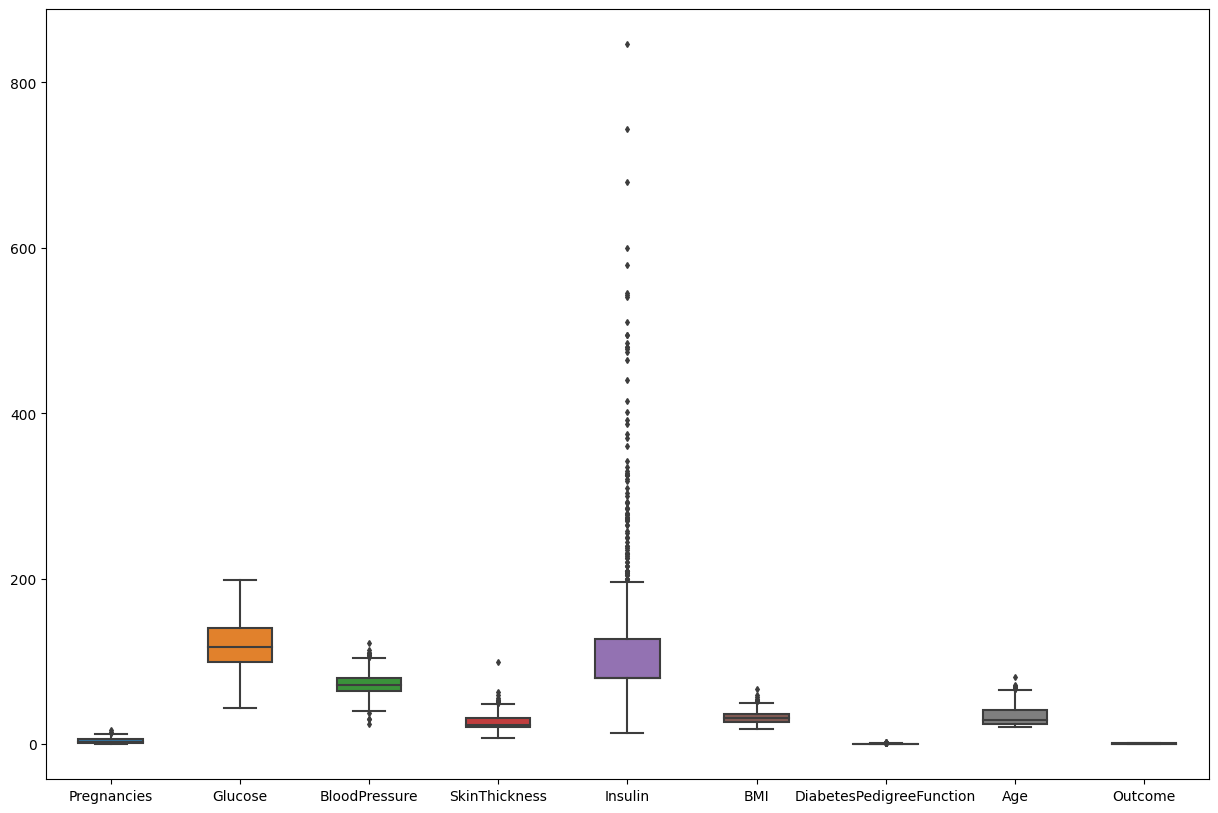

In [90]:
## lets deal with outliers
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=3,width=0.5)

In [94]:
# for daibetic pateints insulin has many outliers. 
# To solve this either we remove these data points or scale down to standard scaler

In [92]:
## Lets segregate dependent and independent features

In [95]:
##Preprocess data
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [96]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [97]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [100]:
## split the data into train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [111]:
# standardization
import pickle
def standard_scale(X_train,X_test):
    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(X_train)
    scaled_x_test = scaler.transform(X_test)
    with open('../artifacts/standard_scaler.pkl','wb') as fp:
        pickle.dump(scaler,fp)
    return scaled_x_train,scaled_x_test

In [123]:
x_train_scaled,x_test_scaled = standard_scale(X_train,X_test)

In [135]:
x_train_scaled

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

In [154]:
## find the best parmeters
parameters = {
    'penalty':('l1', 'l2', 'elasticnet'),
    'C':[-3,-2,-1,0,1,2,3],
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'sag')
}
             
clf = LogisticRegression()


In [155]:
prams = GridSearchCV(clf,parameters,cv=10,scoring='accuracy')

In [156]:
prams.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [-3, -2, -1, 0, 1, 2, 3],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'sag')},
             scoring='accuracy')

In [157]:
print(prams.best_params_)
print(prams.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.7741681790683606


In [166]:
classifier = LogisticRegression(penalty='l1',solver='liblinear',C=1)

In [167]:
classifier.fit(x_train_scaled,y_train)
y_pred = classifier.predict(x_test_scaled)

In [168]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100  23]
 [ 27  42]]
0.7395833333333334
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [169]:
## Cross validation
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits=5,random_state=None,shuffle=True)
scores = cross_val_score(classifier,X_train,y_train,cv=cv,scoring='accuracy')
print(scores)

[0.75       0.8173913  0.77391304 0.76521739 0.7826087 ]


In [133]:
final_result = final_score =np.mean(scores)
print(final_score)

0.7794752623688156


In [170]:
import pickle
with open('../artifacts/model.pkl','wb') as fp:
    pickle.dump(classifier,fp)